In [134]:
import pandas as pd

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [135]:
df = pd.read_csv('/nfs/home/vyasa/projects/proj_off/data_off/clarify/spanish_comorbidity/train_MEV_ents_jaccard.csv', encoding='utf-8')

In [136]:
df.head(5)

,table_name,column_name,value,replacement,replacement_google,replacement_deepl,replacement_ents,replacement_google_ents,replacement_deepl_ents,replacement_ents_len,replacement_google_ents_len,replacement_deepl_ents_len,mev_cui_score,google_cui_score,deepl_cui_score,mev_cui_len,google_cui_len,deepl_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl
0,comorbidity_treatment_line,comorbidity,Gastritis crÛnica,Chronic gastritis,Chronic gastritis,Chronic gastritis,"(Chronic gastritis,)","(Chronic gastritis,)","(Chronic gastritis,)",1,1,1,"[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]",5,5,5,1.0,1.0
1,comorbidity_treatment_line,comorbidity,Sarcoma PleomÛrfico Pectoral Mayor,Pectoralis major pleomorphic sarcoma,Pectoralis Major Pleomorphic Sarcoma,Pectoralis major pectoralis pleomÛrphic sarcoma,"(Pectoralis, pleomorphic sarcoma)","(Pectoralis, Pleomorphic Sarcoma)","(Pectoralis, pectoralis, pleomÛrphic sarcoma)",2,2,3,"[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.9260651469230652), ('C0205825', 0.8506943583488464), ('C0598607', 0.8253174424171448), ('C1514164', 0.7949097156524658), ('C0334463', 0.7733286619186401)]]","[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.9260651469230652), ('C0205825', 0.8506943583488464), ('C0598607', 0.8253174424171448), ('C1514164', 0.7949097156524658), ('C0334463', 0.7733286619186401)]]","[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.8508138656616211), ('C0205825', 0.7745615839958191), ('C0598607', 0.7514415383338928), ('C0334463', 0.7104898691177368)]]",10,10,14,1.0,0.9
2,comorbidity_treatment_line,comorbidity,hiperuricemia,Hyperuricemia,Hyperuricemia,Hyperuricemia,"(Hyperuricemia,)","(Hyperuricemia,)","(Hyperuricemia,)",1,1,1,"[[('C0740394', 0.9999999403953552), ('C4553069', 0.9999999403953552), ('C1856288', 0.9496486783027649), ('C4685211', 0.8526141047477722), ('C4686280', 0.8423790335655212)]]","[[('C0740394', 0.9999999403953552), ('C4553069', 0.9999999403953552), ('C1856288', 0.9496486783027649), ('C4685211', 0.8526141047477722), ('C4686280', 0.8423790335655212)]]","[[('C0740394', 0.9999999403953552), ('C4553069', 0.9999999403953552), ('C1856288', 0.9496486783027649), ('C4685211', 0.8526141047477722), ('C4686280', 0.8423790335655212)]]",5,5,5,1.0,1.0
3,comorbidity_treatment_line,comorbidity,intervenido pÛlipo colon,Colon polyp operated,Colon plipo intervened,Intervened pÛlipo colon,"(Colon polyp,)","(Colon, plipo)","(Intervened, pÛlipo colon)",1,2,2,"[[('C0009376', 1.0), ('C0032584', 0.8226818442344666), ('C1333090', 0.8206176161766052), ('C0742605', 0.7988194823265076), ('C0742556', 0.7651610374450684)]]","[[('C0009368', 1.0), ('C2684091', 1.0), ('C3888384', 1.0), ('C0391907', 0.9528627991676331), ('C0007102', 0.8239243030548096)], [('C0122111', 0.7958453297615051), ('C1333906', 0.7958453297615051), ('C1705263', 0.7958453297615051), ('C3489413', 0.7958453297615051)]]","[[], [('C0122111', 0.7445406317710876), ('C1333906', 0.7445406317710876), ('C1705263', 0.7445406317710876), ('C3489413', 0.7445406317710

In [137]:
df.columns

Index(['table_name', 'column_name', 'value', 'replacement',
       'replacement_google', 'replacement_deepl', 'replacement_ents',
       'replacement_google_ents', 'replacement_deepl_ents',
       'replacement_ents_len', 'replacement_google_ents_len',
       'replacement_deepl_ents_len', 'mev_cui_score', 'google_cui_score',
       'deepl_cui_score', 'mev_cui_len', 'google_cui_len', 'deepl_cui_len',
       'cui_jacD_mev_google', 'cui_jacD_mev_deepl'],
      dtype='object')

In [140]:
df[['mev_cui_len','cui_jacD_mev_google', 'cui_jacD_mev_deepl']].describe()

,mev_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl
count,882.000000,881.000000,881.000000
mean,5.069161,0.409313,0.389624
std,1.909050,0.420844,0.420852
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,5.000000,0.250000,0.200000
75%,5.000000,1.000000,1.000000
max,15.000000,1.000000,1.000000


In [141]:
df[['replacement_ents_len', 'replacement_google_ents_len', 'replacement_deepl_ents_len', 'mev_cui_len','cui_jacD_mev_google', 'cui_jacD_mev_deepl']].describe()

,replacement_ents_len,replacement_google_ents_len,replacement_deepl_ents_len,mev_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl
count,882.000000,882.000000,882.000000,882.000000,881.000000,881.000000
mean,1.106576,1.462585,1.450113,5.069161,0.409313,0.389624
std,0.356522,0.817838,0.830946,1.909050,0.420844,0.420852
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000,0.250000,0.200000
75%,1.000000,2.000000,2.000000,5.000000,1.000000,1.000000
max,4.000000,5.000000,6.000000,15.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'replacement_ents_len'}>,
        <AxesSubplot:title={'center':'replacement_google_ents_len'}>],
       [<AxesSubplot:title={'center':'replacement_deepl_ents_len'}>,
        <AxesSubplot:title={'center':'mev_cui_len'}>]], dtype=object)

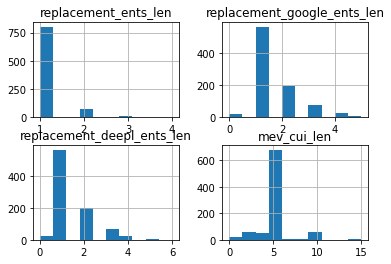

In [142]:
df[['replacement_ents_len', 'replacement_google_ents_len', 'replacement_deepl_ents_len']].hist()

In [ ]:
df[['mev_cui_len','google_cui_len', 'deepl_cui_len']].hist()

array([[<AxesSubplot:title={'center':'cui_jacD_mev_google'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl'}>]],
      dtype=object)

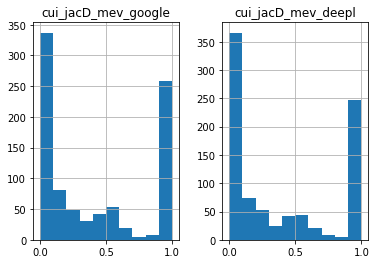

In [143]:
df[['cui_jacD_mev_google', 'cui_jacD_mev_deepl']].hist()

In [144]:
df[['replacement_ents_len', 'replacement_google_ents_len', 'replacement_deepl_ents_len', 'mev_cui_len', 'cui_jacD_mev_google', 'cui_jacD_mev_deepl']].describe()

,replacement_ents_len,replacement_google_ents_len,replacement_deepl_ents_len,mev_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl
count,882.000000,882.000000,882.000000,882.000000,881.000000,881.000000
mean,1.106576,1.462585,1.450113,5.069161,0.409313,0.389624
std,0.356522,0.817838,0.830946,1.909050,0.420844,0.420852
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000,0.250000,0.200000
75%,1.000000,2.000000,2.000000,5.000000,1.000000,1.000000
max,4.000000,5.000000,6.000000,15.000000,1.000000,1.000000


In [145]:
# df[df['mev_cui_len']==0][['table_name', 'column_name', 'value', 'replacement']].to_csv('../../../data_off/clarify/spanish_comorbidity/train_MEV_left.csv', encoding='utf-8')

In [146]:
df[df['mev_cui_len']==0]

,table_name,column_name,value,replacement,replacement_google,replacement_deepl,replacement_ents,replacement_google_ents,replacement_deepl_ents,replacement_ents_len,replacement_google_ents_len,replacement_deepl_ents_len,mev_cui_score,google_cui_score,deepl_cui_score,mev_cui_len,google_cui_len,deepl_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl
160,comorbidity_treatment_line,comorbidity,SCASEST,SCASEST,SCASEST,SCASEST,"(SCASEST,)","(SCASEST,)","(SCASEST,)",1,1,1,[[]],[[]],[[]],0,0,0,NaN,NaN
511,comorbidity_treatment_line,comorbidity,ex bebedor desde 2000,Alcholic,Former drinker since 2000,Former drinker since 2000,"(Alcholic,)","(Former drinker,)","(Former drinker,)",1,1,1,[[]],"[[('C0556338', 0.8088580965995789), ('C0337679', 0.7842944860458374), ('C0457801', 0.7356861233711243), ('C0556317', 0.7054317593574524)]]","[[('C0556338', 0.8088580965995789), ('C0337679', 0.7842944860458374), ('C0457801', 0.7356861233711243), ('C0556317', 0.7054317593574524)]]",0,4,4,0.0,0.0
675,comorbidity_treatment_line,comorbidity,"Bebedor de m·s de 60g diarios, antes m·s",Alcholic,"Drinker of more than 60g a day, before more","Drinker of more than 60g per day, formerly more.","(Alcholic,)","(Drinker, day)","(Drinker, day)",1,2,2,[[]],"[[('C0556338', 1.0), ('C0457801', 0.9095380902290344), ('C0556317', 0.8721373677253723), ('C0556335', 0.8385928869247437), ('C0556305', 0.8328987956047058)], [('C0439228', 1.0), ('C1561538', 1.0), ('C1561539', 1.0), ('C1442449', 0.9166703820228577), ('C0439505', 0.8695443272590637)]]","[[('C0556338', 1.0), ('C0457801', 0.9095380902290344), ('C0556317', 0.8721373677253723), ('C0556335', 0.8385928869247437), ('C0556305', 0.8328987956047058)], [('C0439228', 1.0), ('C1561538', 1.0), ('C1561539', 1.0), ('C1442449', 0.9166703820228577), ('C0439505', 0.8695443272590637)]]",0,10,10,0.0,0.0
677,comorbidity_treatment_line,comorbidity,Bebedor importante (3/4 Litro vino al dÌa),Alcholic,Important drinker (3/4 Liter wine a day),Heavy drinker (3/4 liter wine per day),"(Alcholic,)","(drinker, Liter wine, day)","(Heavy drinker, liter wine, day)",1,3,3,[[]],"[[('C0556338', 1.0), ('C0457801', 0.9095380902290344), ('C0556317', 0.8721373677253723), ('C0556335', 0.8385928869247437), ('C0556305', 0.8328987956047058)], [('C0475211', 0.7137360572814941), ('C0043188', 0.7004146575927734)], [('C0439228', 1.0), ('C1561538', 1.0), ('C1561539', 1.0), ('C1442449', 0.9166703820228577), ('C0439505', 0.8695443272590637)]]","[[('C0001969', 0.9999998807907104), ('C0337678', 0.9999998807907104), ('C0556301', 0.922295868396759), ('C0687132', 0.8367065787315369), ('C0556300', 0.793872594833374)], [('C0475211', 0.7137360572814941), ('C0043188', 0.7004146575927734)], [('C0439228', 1.0), ('C1561538', 1.0), ('C1561539', 1.0), ('C1442449', 0.9166703820228577), ('C0439505', 0.8695443272590637)]]",0,12,12,0.0,0.0
